# The Marine Navigation problem

We consider a ship moving in a portion of ocean undergoing a constant current (the whole fluid has constant horizontal velocity W) and towing a spread. Let us first model the movement of the ship alone, then of the ship with its towed streamer. Let us normalize these parameters, we get the following normalised control system :

$$
\left \lbrace
\begin{array}{l}
\dot x = w+\cos\theta\\
\dot y = \sin\theta\\
\dot\theta = u\\
\dot \beta_k = -u-\frac 1l(\prod_{j=1}^{k-1}\cos(\beta_j-\beta_{j-1}))\sin(\beta_k-\beta_{k-1})\\
\beta_k = \theta_k - \theta, \ \theta_0 = \theta \\
|u| \le 1, \ 0\le w < 1, \ 0<l<1
\end{array}
\right .
$$

In [7]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os,shutil
!pygmentize problem.cpp

// +++DRAFT+++ This class implements the OCP functions
// It derives from the generic class bocop3OCPBase
// OCP functions are defined with templates since they will be called
// from both the NLP solver (double arguments) and AD tool (ad_double arguments)
//#pragma once

#include <OCP.h>
// ///////////////////////////////////////////////////////////////////


template <typename Variable>
void OCP::finalCost(double initial_time, double final_time, const Variable *initial_state, const Variable *final_state, const Variable *parameters, const double *constants, Variable &final_cost)
{
  // minimise time
  final_cost = parameters[0];
}


template <typename Variable>
void OCP::dynamics(double time, const Variable *state, const Variable *control, const Variable *parameters, const double *constants, Variable *state_dynamics)
{
  double w = constants[0];
  double l = constants[1];

  Variable x = state[0];
  Variable y = state[1];
  Variable theta = state[2];
  Variable beta1 = state[3];
  Var

In [2]:
%matplotlib inline
import bocop
problem_path = "." # using local problem definition
clean = 0
debug = 0
graph = 2
verbose = 1
bocop.build(problem_path)

[EXEC] > ['cmake -DCMAKE_BUILD_TYPE=Debug -DPROBLEM_DIR=/net/home/d/dy811384/gallery/examples/nav/N=3 /net/home/d/dy811384/.conda/envs/ct-gallery/lib/python3.7/site-packages/bocop']
>	-- The C compiler identification is GNU 7.5.0
>	-- The CXX compiler identification is GNU 7.5.0
>	-- Detecting C compiler ABI info
>	-- Detecting C compiler ABI info - done
>	-- Check for working C compiler: /net/home/d/dy811384/.conda/envs/ct-gallery/bin/x86_64-conda-linux-gnu-cc - skipped
>	-- Detecting C compile features
>	-- Detecting C compile features - done
>	-- Detecting CXX compiler ABI info
>	-- Detecting CXX compiler ABI info - done
>	-- Check for working CXX compiler: /usr/bin/c++ - skipped
>	-- Detecting CXX compile features
>	-- Detecting CXX compile features - done
>	-- Problem path: /net/home/d/dy811384/gallery/examples/nav/N=3
>	-- Using CPPAD found at /net/home/d/dy811384/.conda/envs/ct-gallery/include/cppad/..
>	-- Using IPOPT found at /net/home/d/dy811384/.conda/envs/ct-gallery/lib/lib

0

iteration 1000  objective : 1.9575630657942338e-18


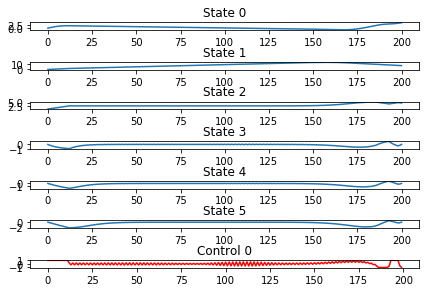

Output(layout=Layout(border='1px solid black'))

Done
Loading solution:  ./problem-Copy1.sol


In [8]:
path_def = './def'
fileList = os.listdir(path_def)
solutions = []
for file in os.listdir(path_def):
    if file.endswith('.def'):
        shutil.copyfile(os.path.join(path_def,file), os.path.join(problem_path,'problem.def'))
        sol_name = file.replace('.def','.sol')
        bocop.run(problem_path, clean)
        os.rename("problem.sol",sol_name)
        solutions.append(bocop.readSolution(problem_path +'/' + sol_name))

In [3]:
import matplotlib.pyplot as plt
import numpy as np
import math
import os,shutil
import bocop

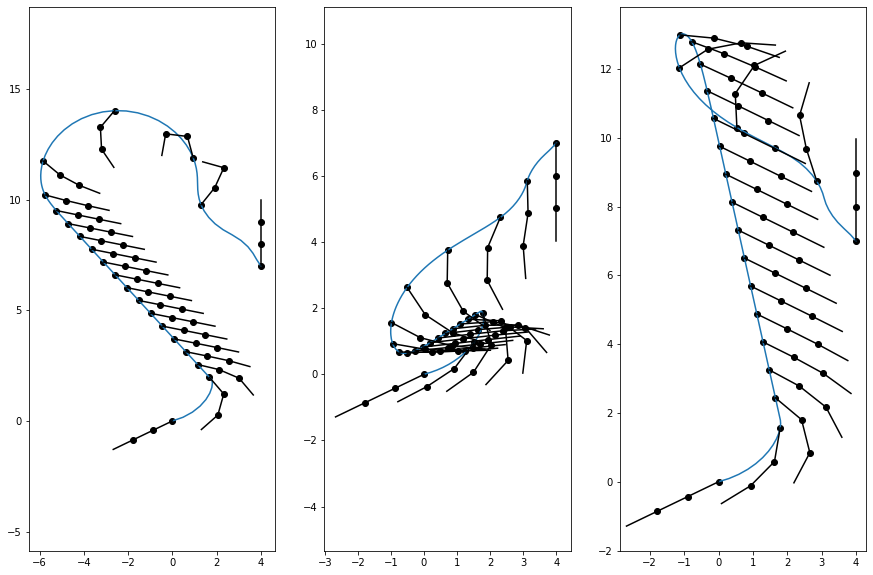

In [8]:
plt.figure(figsize=(15,10))
N = np.size(solutions[0].state[0,:])
l = 0.99
for s,solution in enumerate(solutions):
    plt.subplot(131+s)
    plt.plot(solution.state[0,:],solution.state[1,:])
    for i in range(0,N,int(N/20)):
        z = np.array([solution.state[0,i],solution.state[1,i]])
        theta = solution.state[2,i]
        beta1,beta2,beta3 = solution.state[3,i],solution.state[4,i],solution.state[5,i]
        theta1,theta2,theta3 = beta1+theta,beta2+theta,beta3+theta
        z1 = z - l*np.array([np.cos(theta1), np.sin(theta1)])
        z2 = z1 - l*np.array([np.cos(theta2), np.sin(theta2)])
        z3 = z2 - l*np.array([np.cos(theta3), np.sin(theta3)])
        plt.plot([z[0],z1[0]],[z[1],z1[1]],c='black')
        plt.plot([z1[0],z2[0]],[z1[1],z2[1]],c='black')
        plt.plot([z2[0],z3[0]],[z2[1],z3[1]],c='black')
        plt.scatter(z[0],z[1],c='black')
        plt.scatter(z1[0],z1[1],c='black')
        plt.scatter(z2[0],z2[1],c='black')
        plt.axis("equal")
plt.show()

In [12]:
for solution in solutions:
    print(solution.parameters[0])

59.0221568859628
23.6508289395203
36.8619844723306


Case $N = 3, \ w=0.8,l=0.99$

Boundary conditions: $\theta_0 = \pi /7,\ \theta_f = -\pi / 2$

Final time: $t_f=59.0221568859628 $

Boundary conditions: $\theta_0 = \pi /7,\ \theta_f = \pi / 2$

Final time: $t_f=23.6508289395203 $

Boundary conditions: $\theta_0 = \pi /7,\ \theta_f = 3\pi / 2$

Final time: $t_f=36.8619844723306 $